In [35]:
import qiskit
import numpy as np
import sys
sys.path.insert(1, '../')
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.fubini_study, qtm.encoding
import importlib
importlib.reload(qtm.base_qtm)
importlib.reload(qtm.constant)
importlib.reload(qtm.qtm_1qubit)
importlib.reload(qtm.qtm_nqubit)
importlib.reload(qtm.fubini_study)

<module 'qtm.fubini_study' from '..\\qtm\\fubini_study.py'>

In [43]:
num_qubits = 3
num_layers = 1
theta = np.pi/3
thetas_origin = np.random.random((num_qubits*5 - 4)*num_layers)

In [23]:
# GHZ

thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_ghz = []
thetass_ghz = []
for i in range(0, 400):
    # fubini_study for binho_state is same for koczor state
    
    print('GHZ (' + str(num_layers) + ' layer): ', i)
    G = qtm.fubini_study.calculate_alternative_layered_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_GHZchecker_alternating_layered,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.qtm_nqubit.create_GHZchecker_alternating_layered(qc.copy(), thetas, num_layers, theta)  
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_ghz.append(loss)
    thetass_ghz.append(thetas)
traces_ghz, fidelities_ghz = [], []
for thetas in thetass_ghz:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_alternating_layerd_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_ghz.append(trace)
    fidelities_ghz.append(fidelity)
    # Plot loss value in 100 steps
print('Writting ... ' + str(num_qubits))

np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/loss_values_ghz.csv", loss_values_ghz, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/thetass_ghz.csv", thetass_ghz, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/traces_ghz.csv", traces_ghz, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/fidelities_ghz.csv", fidelities_ghz, delimiter=",")



GHZ (1 layer):  0
GHZ (1 layer):  1
GHZ (1 layer):  2
GHZ (1 layer):  3
GHZ (1 layer):  4
GHZ (1 layer):  5
GHZ (1 layer):  6
GHZ (1 layer):  7
GHZ (1 layer):  8
GHZ (1 layer):  9
GHZ (1 layer):  10
GHZ (1 layer):  11
GHZ (1 layer):  12
GHZ (1 layer):  13
GHZ (1 layer):  14
GHZ (1 layer):  15
GHZ (1 layer):  16
GHZ (1 layer):  17
GHZ (1 layer):  18
GHZ (1 layer):  19
GHZ (1 layer):  20
GHZ (1 layer):  21
GHZ (1 layer):  22
GHZ (1 layer):  23
GHZ (1 layer):  24
GHZ (1 layer):  25
GHZ (1 layer):  26
GHZ (1 layer):  27
GHZ (1 layer):  28
GHZ (1 layer):  29
GHZ (1 layer):  30
GHZ (1 layer):  31
GHZ (1 layer):  32
GHZ (1 layer):  33
GHZ (1 layer):  34
GHZ (1 layer):  35
GHZ (1 layer):  36
GHZ (1 layer):  37
GHZ (1 layer):  38
GHZ (1 layer):  39
GHZ (1 layer):  40
GHZ (1 layer):  41
GHZ (1 layer):  42
GHZ (1 layer):  43
GHZ (1 layer):  44
GHZ (1 layer):  45
GHZ (1 layer):  46
GHZ (1 layer):  47
GHZ (1 layer):  48
GHZ (1 layer):  49
GHZ (1 layer):  50
GHZ (1 layer):  51
GHZ (1 layer):  52
GHZ

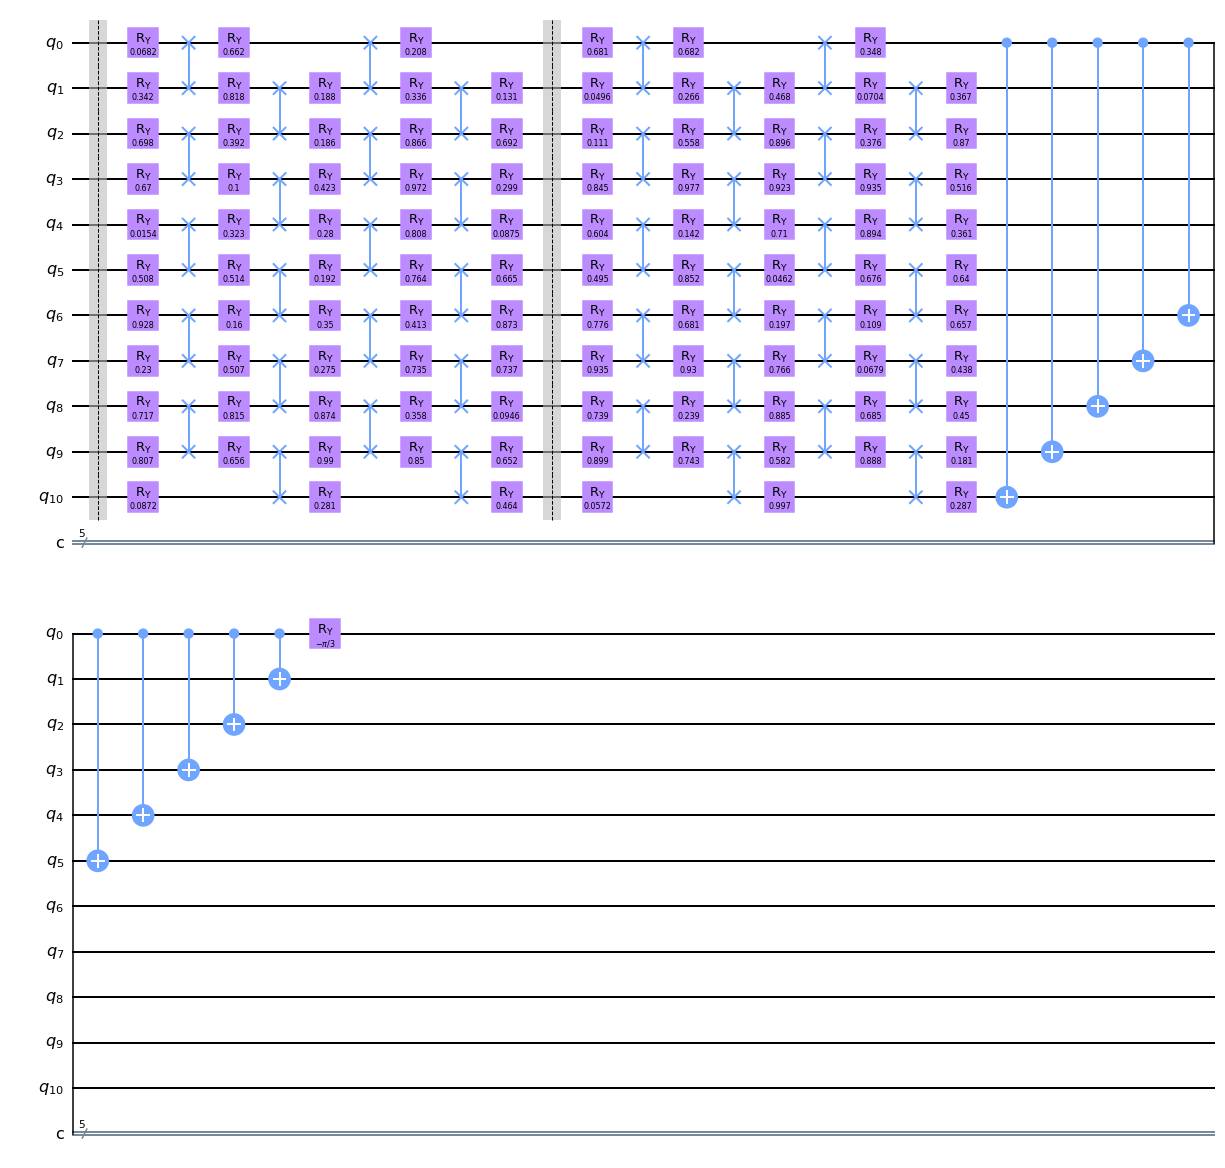

In [33]:
qc = qiskit.QuantumCircuit(11,5)
thetas = np.random.random((11*5 - 4)*2)
qc = qtm.qtm_nqubit.create_GHZchecker_alternating_layered(qc, thetas, 2, theta)
qc.draw('mpl')

In [44]:
thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
loss_values_w = []
thetass_w = []
for i in range(0, 10):
    if i % 20 == 0:
        print('W (' + str(num_layers) + ' layer): ', i)
    G = qtm.fubini_study.calculate_alternative_layered_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_Wchecker_alternating_layered, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_Wchecker_alternating_layered(qc.copy(), thetas, num_layers)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_w.append(loss)
    thetass_w.append(thetas)

traces_w, fidelities_w = [], []
for thetas in thetass_w:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_alternating_layerd_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.qtm_nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_w.append(trace)
    fidelities_w.append(fidelity)
print('Writting ... ' + str(num_qubits))
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/loss_values_w.csv", loss_values_w, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/thetass_w.csv", thetass_w, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/traces_w.csv", traces_w, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/fidelities_w.csv", fidelities_w, delimiter=",")



W (1 layer):  0
Writting ...


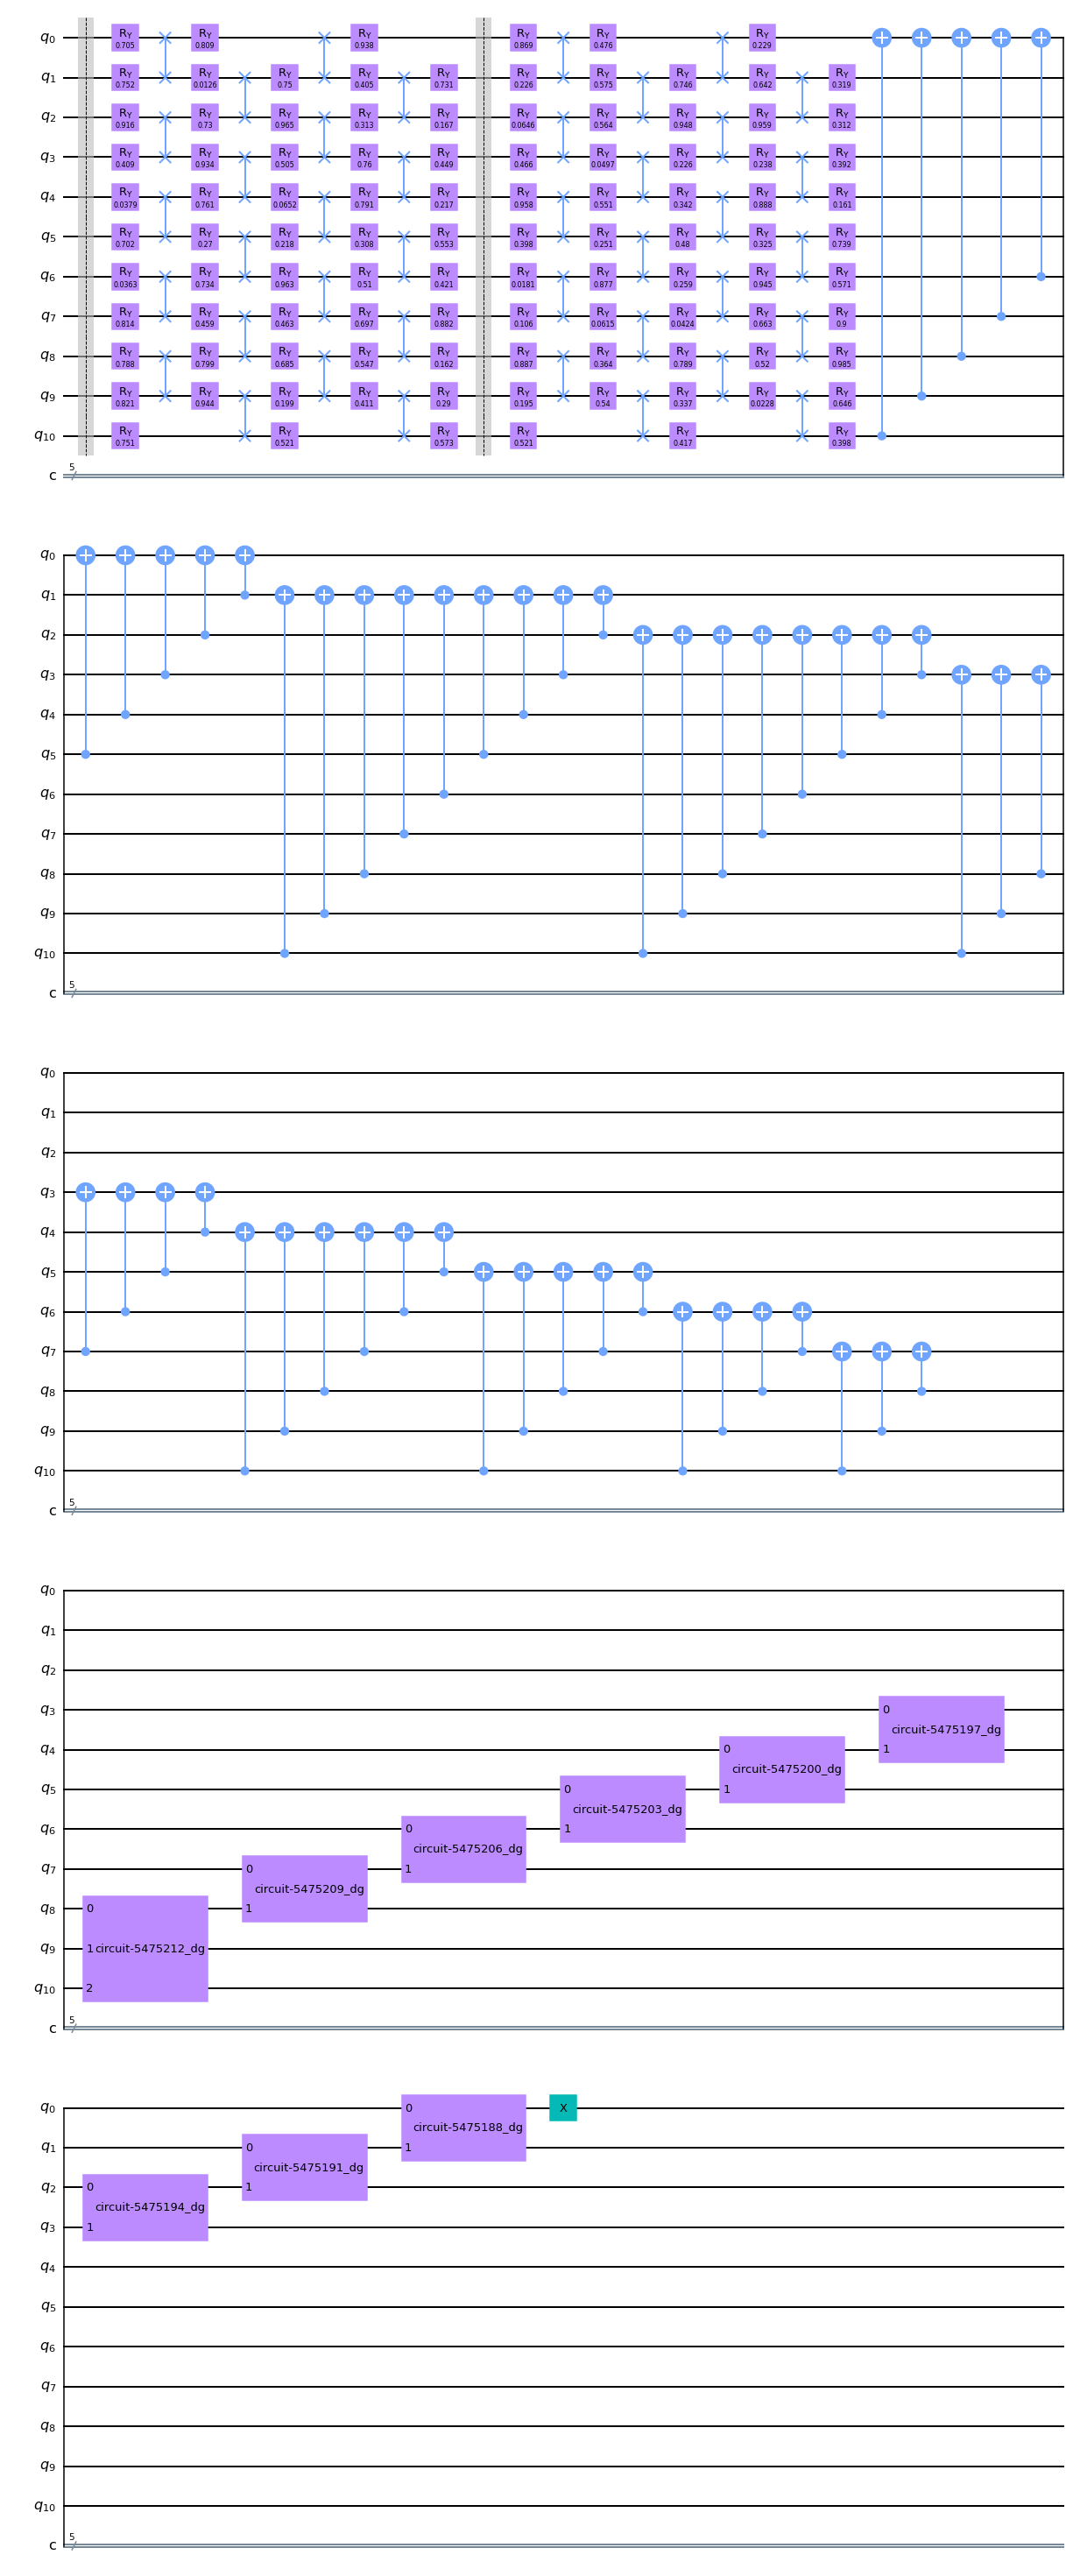

In [38]:
qc = qiskit.QuantumCircuit(11,5)
thetas = np.random.random((11*5 - 4)*2)
qc = qtm.qtm_nqubit.create_Wchecker_alternating_layered(qc, thetas, 2)
qc.draw('mpl')

In [49]:
psi = 2*np.random.rand(2**num_qubits)-1
# Haar
thetas = thetas_origin.copy()

psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')

loss_values_haar = []
thetass_haar = []
for i in range(0, 10):
    if i % 20 == 0:
        print('Haar (' + str(num_layers) + ' layer): ', i)
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    G = qtm.fubini_study.calculate_alternative_layered_state(qc.copy(), thetas, num_layers)
    qc = encoder.qcircuit
    grad_loss = qtm.base_qtm.grad_loss(
        qc, 
        qtm.qtm_nqubit.create_haarchecker_alternating_layered, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, encoder = encoder)

    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.qtm_nqubit.create_haarchecker_alternating_layered(qc.copy(), thetas, num_layers, encoder)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_haar.append(loss)
    thetass_haar.append(thetas)

traces_haar, fidelities_haar = [], []
for thetas in thetass_haar:
# Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.qtm_nqubit.create_alternating_layerd_state(qc, thetas, num_layers = num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = encoder.qcircuit
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
    traces_haar.append(trace)
    fidelities_haar.append(fidelity)
print('Writting ... ' + str(num_qubits))
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/loss_values_haar.csv", loss_values_haar, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/thetass_haar.csv", thetass_haar, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/traces_haar.csv", traces_haar, delimiter=",")
np.savetxt("../../experiments/alternating_layered_ansatz/" + str(num_qubits) + "/fidelities_haar.csv", fidelities_haar, delimiter=",")



Haar (1 layer):  0
Writting ... 3
